# Análise - FTIR

---------------

O espectro FTIR representa a absorção de frequências de radiação eletromagnéticas na região do Infravermelho. Na química, a região de interesse se concentra na região vibracional, que inclui radiações com comprimentos de onda ($\lambda$) entre 2500 nm e 25000 nm.     
    
No entanto, nas representações mais utilizadas em artigos e livros, é comum utilizar a unidade de número de onda ao invés de comprimento de onda. Para isso, basta realizar uma conversão básica:   

\begin{equation}
    v \left[\text{cm}^{-1}\right] = \frac{1}{\lambda \left[\text{cm}^{-1}\right]}.
\end{equation}     

Números de onda (v) são expressos em centímetros recíprocos $(\text{cm}^{-1})$ e são calculados com base na equação acima, apenas calculando o recíproco do comprimento de onda em centímetros. O motivo o qual os químicos preferem utilizar número de onda como unidade é que ela é diretamente proporcional à energia (quanto maior o número de onda, maior a energia). Em termos de número de onda então, o espectro vai de 4000 a 400 $\text{cm}^{-1}$.   

-----------

### Imports 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

### Leitura dos dados

In [4]:
data = []
with open("FTIR_Anelise_29.txt", "r") as f:
    for line in f:
        if not line.startswith("##") and line.strip():
            parts = line.split()
            if len(parts) == 2:
                data.append([float(parts[0]), float(parts[1])])

df = pd.DataFrame(data, columns=["Wavenumber (cm-1)", "Transmittance (%T)"])

### Aplicação do filtro de suavização

In [5]:
df["SavGol"] = savgol_filter(df["Transmittance (%T)"], window_length=21, polyorder=3)

O uso de filtros de suavização em espectros FTIR tem como objetivo reduzir o ruído experimental sem comprometer as informações químicas presentes nos picos. O filtro de Savitzky–Golay ajusta um polinômio dentro de uma janela de pontos e utiliza esse ajuste para calcular os valores suavizados. Esse processo permite reduzir o ruído preservando melhor a forma dos picos, incluindo sua altura, largura e posição. Essa característica é particularmente importante em espectros de FTIR, já que a integridade dos picos vibracionais é essencial para a correta interpretação das bandas de absorção.    
     
No caso do filtro de Savitzky–Golay, o uso de uma janela de 21 pontos garante que o ruído seja atenuado sem perder resolução espectral, enquanto o polinômio de ordem três (cúbico) é suficiente para modelar a curvatura típica dos picos sem introduzir artefatos. Utilizar uma janela grande demais remove detalhes do espectro, enquanto uma janela pequena demais não remove o ruído. Para isso, devemos ajustar conforme os dados.

### Aplicação da Média Móvel

In [6]:
df["Rolling"] = df["Transmittance (%T)"].rolling(window=10, center=True).mean()

A média móvel é uma técnica simples em que cada ponto do espectro é substituído pela média de um número fixo de vizinhos. Esse método é eficiente para reduzir flutuações rápidas, porém tende a achatar os picos e, em alguns casos, pode deslocar a posição deles, o que representa uma perda de resolução espectral. Por isso, ela é mais adequada quando se busca apenas uma visualização preliminar do espectro ou quando o sinal apresenta um nível de ruído muito elevado. Nesse caso, ela foi utilizada para ter um dado comparativo.    
    
Para a média móvel, a janela de 10 pontos representa uma suavização moderada: grande o bastante para reduzir flutuações de fundo, mas não tão grande a ponto de apagar os sinais característicos. Além disso, a opção de centralizar a média evita que haja deslocamento do espectro.

### Plotagem

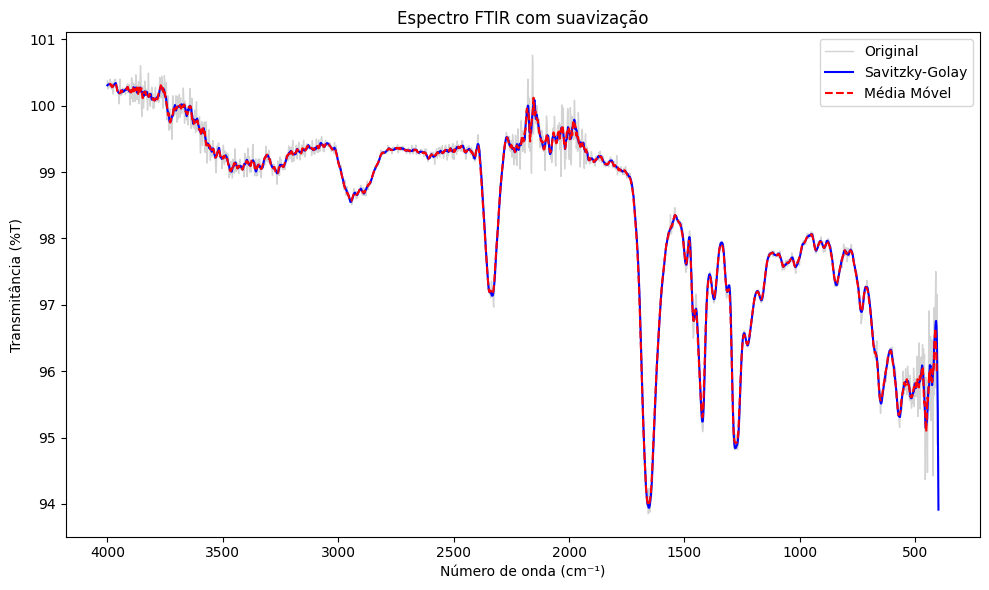

In [7]:
plt.figure(figsize=(10,6))

plt.plot(df["Wavenumber (cm-1)"], df["Transmittance (%T)"], # dados originais
         color="lightgray", label="Original", linewidth=1)


plt.plot(df["Wavenumber (cm-1)"], df["SavGol"],  # dados suavizados com o filtro Savitzky-Golay
         color="blue", label="Savitzky-Golay", linewidth=1.5)


plt.plot(df["Wavenumber (cm-1)"], df["Rolling"], # dados com média mível
         color="red", linestyle="--", label="Média Móvel", linewidth=1.5)


plt.gca().invert_xaxis()  # inverte eixo X (padrão FTIR)
plt.xlabel("Número de onda (cm⁻¹)")
plt.ylabel("Transmitância (%T)")
plt.title("Espectro FTIR com suavização")
plt.legend()
plt.tight_layout()
plt.show()

----------------

### Salvando os dados suavizados com o filtro 

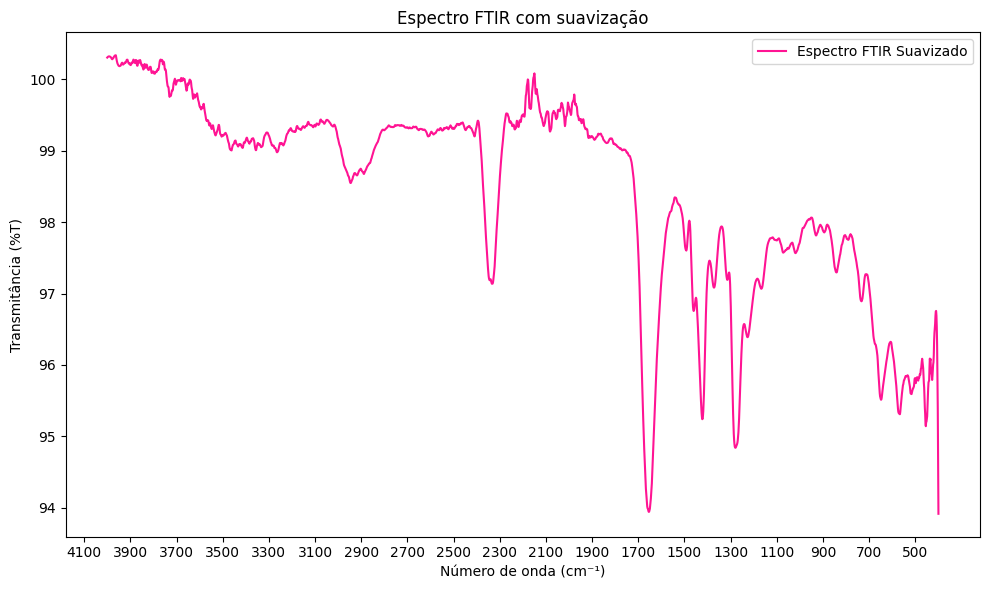

In [9]:
plt.figure(figsize=(10,6))

# Savitzky-Golay
plt.plot(df["Wavenumber (cm-1)"], df["SavGol"], 
         color="deeppink", label="Espectro FTIR Suavizado", linewidth=1.5)

plt.gca().invert_xaxis()  # inverte eixo X (padrão FTIR)
plt.xticks(range(500, 4201, 200))
plt.xlabel("Número de onda (cm⁻¹)")
plt.ylabel("Transmitância (%T)")
plt.title("Espectro FTIR com suavização")
plt.legend()
plt.tight_layout()
plt.savefig("FTIR_S13", dpi=400 )
plt.show()

-----------

### Análise Móvel do Espectro - Ponto a Ponto

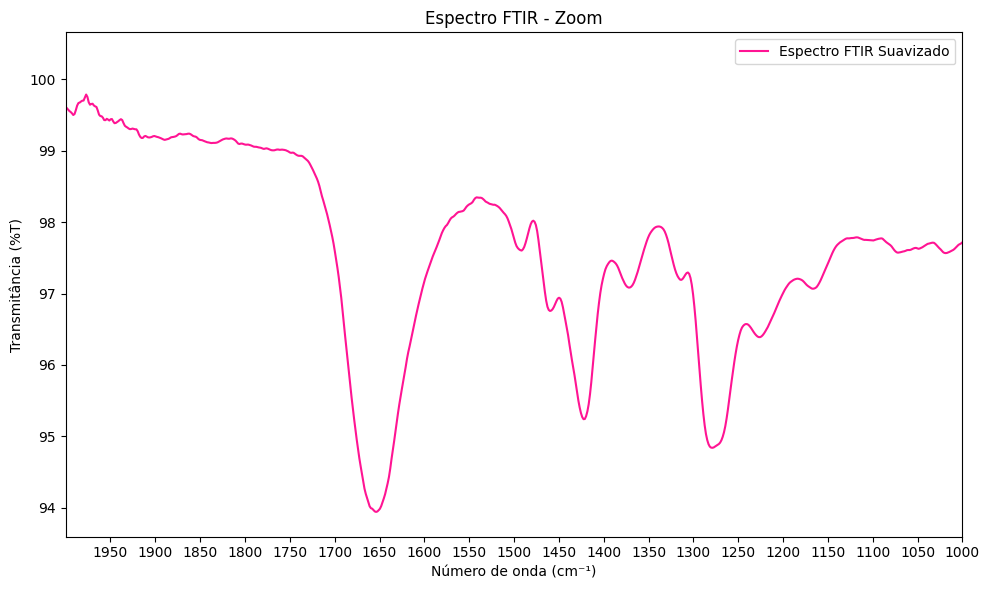

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df["Wavenumber (cm-1)"], df["SavGol"], 
         color="deeppink", label="Espectro FTIR Suavizado", linewidth=1.5)

plt.gca().invert_xaxis()
plt.xlabel("Número de onda (cm⁻¹)")
plt.ylabel("Transmitância (%T)")
plt.title("Espectro FTIR - Zoom")
plt.legend()

# Análise de uma região específica
plt.xlim(2000, 1000)
plt.xticks(range(1000, 2000, 50)) # ajustando os valores do eixo x

plt.tight_layout()
plt.show()

------------

### Atribuição de Bandas

Para essa visualização, com base no código anterior, analisamos as bandas uma a uma e com base em referências e tabelas de correspondência de picos, definimos qual banda equivale a um respectivo número de onda e plotamos o espectro com as bandas já referidas no mesmo.

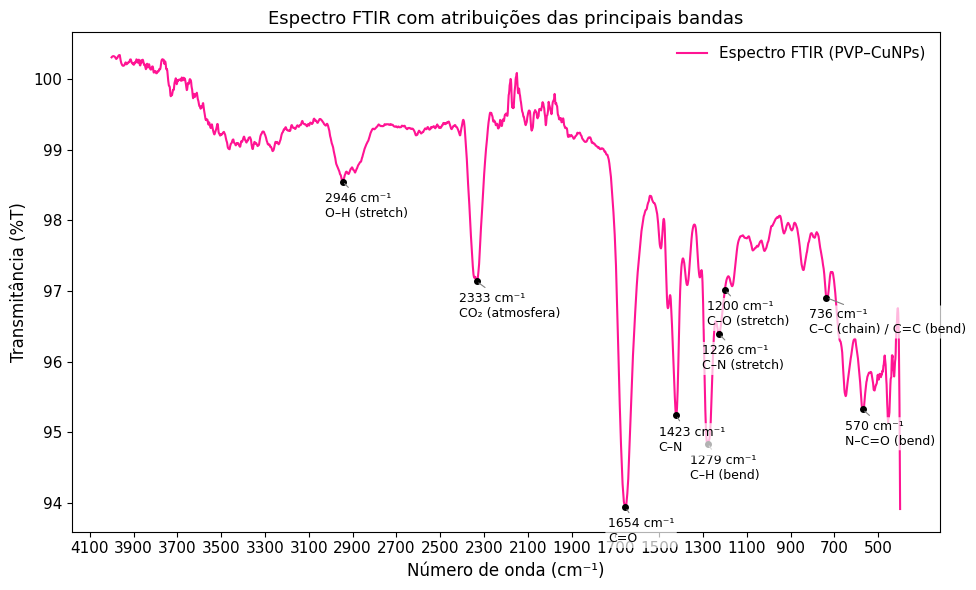

In [12]:
wv = df["Wavenumber (cm-1)"].values
T = df["SavGol"].values


bands = {
    "N–C=O (bend)": (570, 650),
    "C–C (chain) / C=C (bend)": (735, 845),
    "C–O (stretch)": (1150, 1200),
    "C–N (stretch)": (1200, 1250),
    "C–H (bend)": (1250, 1300),
    "C–N": (1400, 1450),
    "C=O": (1650, 1680),
    "CO₂ (atmosfera)": (2300, 2350),
    "O–H (stretch)": (2700, 3200),
}


plt.figure(figsize=(10,6))
plt.plot(wv, T, color="deeppink", lw=1.5, label="Espectro FTIR (PVP–CuNPs)")
plt.gca().invert_xaxis()


plt.xlabel("Número de onda (cm⁻¹)", fontsize=12)
plt.xticks(range(500, 4201, 200))
plt.ylabel("Transmitância (%T)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title("Espectro FTIR com atribuições das principais bandas", fontsize=13)
plt.legend(frameon=False, fontsize=11)


# Ajustes de layout
for label, (lo, hi) in bands.items():
    mask = (wv >= lo) & (wv <= hi)
    if mask.any():
        wn_region = wv[mask]
        T_region = T[mask]
        idx_min = np.argmin(T_region)
        wn_peak = wn_region[idx_min]
        T_peak = T_region[idx_min]
        
        
        plt.plot(wn_peak, T_peak, "o", color="black", markersize=4)
        
        
        plt.annotate(f"{int(round(wn_peak))} cm⁻¹\n{label}",
                     xy=(wn_peak, T_peak),
                     xytext=(wn_peak+80, T_peak-0.5),
                     fontsize=9,
                     ha="left",
                     arrowprops=dict(arrowstyle="-", lw=0.8, color="gray"),
                     bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7))

# Layout clean
plt.tight_layout()
plt.savefig("FTIR_atribuicoes.png", dpi=600, bbox_inches="tight")
plt.show()

----------